In [ ]:
import yfinance as yf
import pandas as pd


In [ ]:
stock_ticker = "AAPL"  # Example: Apple stock
data = yf.download(stock_ticker, start="2020-01-01", end="2025-04-22")

# Show the first few rows
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009117  72.771745  71.783962  71.941328  146322800
2020-01-06  72.582909  72.621646  70.876075  71.127866  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403656  73.706287  71.943766  71.943766  132079200


In [ ]:
data.to_csv("apple_stock_data.csv")


In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv("apple_stock_data.csv")

# Check for missing values
print(data.isnull().sum())


Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv("apple_stock_data.csv")

# Fill missing values using forward fill (previous row)
data.ffill(inplace=True)

# Verify that missing values are gone
print(data.isnull().sum())


Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the data
data = pd.read_csv("apple_stock_data.csv")

# Ensure all columns are numeric
data_numeric = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

# Convert to numeric, forcing errors to be handled
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')

# Apply StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Convert back to DataFrame for easy handling
data_scaled_df = pd.DataFrame(data_scaled, columns=data_numeric.columns)

# Show processed data
print(data_scaled_df.head())


       Open      High       Low     Close    Volume
0       NaN       NaN       NaN       NaN       NaN
1       NaN       NaN       NaN       NaN       NaN
2 -1.904298 -1.907828 -1.884763 -1.883384  0.884979
3 -1.899324 -1.907937 -1.877558 -1.899327  1.090947
4 -1.917689 -1.911303 -1.898183 -1.886388  0.560267


What This Data Means
The first two rows are full of NaN (Not a Number) values. This suggests that during preprocessing, some non-numeric values weren't handled properly.

The remaining rows contain scaled values, meaning the stock prices have been standardized using StandardScaler(). These numbers represent how far each value is from the mean, measured in standard deviations.

Interpreting the Scaled Values
Negative values like -1.904298 mean the stock price was below the average.

Positive values (not seen here but might exist in later rows) mean the stock price was above the average.

The closer a value is to 0, the nearer it is to the mean price.

In [ ]:
data_scaled_df.dropna(inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the data
data = pd.read_csv("apple_stock_data.csv")

# Remove any non-numeric columns before scaling
data_numeric = data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

# Convert all columns to numeric, forcing errors to be replaced with NaN
data_numeric = data_numeric.apply(pd.to_numeric, errors='coerce')

# Drop any remaining NaN values after conversion
data_numeric.dropna(inplace=True)

# Apply MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Convert back to DataFrame for easy handling
data_scaled_df = pd.DataFrame(data_scaled, columns=data_numeric.columns)

# Show processed data
print(data_scaled_df.head())


       Open      High       Low     Close    Volume
0  0.080821  0.084773  0.096577  0.089415  0.278335
1  0.081909  0.084749  0.098118  0.085954  0.305221
2  0.077893  0.084015  0.093706  0.088763  0.235949
3  0.085124  0.085129  0.099272  0.087092  0.212354
4  0.081921  0.089322  0.098895  0.092781  0.269901


Every value is now between 0 and 1, where:

0 means the lowest value in the dataset.

1 means the highest value in the dataset.

Numbers in between show relative positioning.

For example, in the first row:

Open price (0.0808) means it’s closer to the lower end of historical stock prices.

Volume (0.2783) suggests that the number of shares traded that day was around 27.8% of the highest observed volume.

Visualizing Stock Price Trends
We’ll plot the closing price of Apple stock over time to observe patterns

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv("apple_stock_data.csv")

# Check column names
print(data.columns)


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
data.rename(columns={' YourDateColumnName ': 'Date'}, inplace=True)  # Adjust column name


In [ ]:
print(data.columns)


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
data.rename(columns={'YourActualColumnName': 'Date'}, inplace=True)


In [ ]:
import pandas as pd

# Generate a date range based on the dataset length
data_length = len(data)
data['Date'] = pd.date_range(start="2020-01-01", periods=data_length, freq='D')

# Set Date as the index
data.set_index('Date', inplace=True)

# Show first few rows
print(data.head())


                 Price              Close               High  \
Date                                                           
2020-01-01      Ticker               AAPL               AAPL   
2020-01-02        Date                NaN                NaN   
2020-01-03  2020-01-02  72.71607971191406  72.77660582997152   
2020-01-04  2020-01-03  72.00911712646484  72.77174458511139   
2020-01-05  2020-01-06   72.5829086303711  72.62164622763687   

                          Low               Open     Volume  
Date                                                         
2020-01-01               AAPL               AAPL       AAPL  
2020-01-02                NaN                NaN        NaN  
2020-01-03  71.46681974859514   71.7210264890596  135480400  
2020-01-04   71.7839617851537  71.94132818321717  146322800  
2020-01-05  70.87607527260708  71.12786596061405  118387200  


In [ ]:
import pandas as pd

# Load the CSV correctly, skipping extra initial rows
data = pd.read_csv("apple_stock_data.csv", skiprows=2)  # Skip first 2 rows

# Show first few rows to confirm it's clean
print(data.head())


         Date  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0  2020-01-02   72.716080   72.776606   71.466820   71.721026   135480400
1  2020-01-03   72.009117   72.771745   71.783962   71.941328   146322800
2  2020-01-06   72.582909   72.621646   70.876075   71.127866   118387200
3  2020-01-07   72.241547   72.849224   72.021231   72.592594   108872000
4  2020-01-08   73.403656   73.706287   71.943766   71.943766   132079200


In [ ]:
data.rename(columns={'Price': 'Date'}, inplace=True)  # Rename 'Price' to 'Date'
data['Date'] = pd.to_datetime(data['Date'])  # Convert Date to datetime format
data.set_index('Date', inplace=True)  # Set Date as index


We’ll create a line chart to observe how the stock price has evolved over time.

In [ ]:
print(data.columns)


Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], dtype='object')


In [ ]:
import pandas as pd

# Load CSV properly, ensuring the first row is recognized as column headers
data = pd.read_csv("apple_stock_data.csv", header=0)

# Display corrected column names
print(data.columns)


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
data = pd.read_csv("apple_stock_data.csv", skiprows=2)  # Skips first 2 rows
print(data.head())  # Verify structure


         Date  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0  2020-01-02   72.716080   72.776606   71.466820   71.721026   135480400
1  2020-01-03   72.009117   72.771745   71.783962   71.941328   146322800
2  2020-01-06   72.582909   72.621646   70.876075   71.127866   118387200
3  2020-01-07   72.241547   72.849224   72.021231   72.592594   108872000
4  2020-01-08   73.403656   73.706287   71.943766   71.943766   132079200


In [ ]:
data.rename(columns={'Price': 'Date'}, inplace=True)


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [ ]:
print(data.columns)


Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], dtype='object')


In [ ]:
import pandas as pd

# Load CSV correctly, making sure the first row is recognized as column headers
data = pd.read_csv("apple_stock_data.csv", header=0)

# Display corrected column names
print(data.columns)


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
data = pd.read_csv("apple_stock_data.csv", skiprows=1)


In [ ]:
data.rename(columns={'Price': 'Date'}, inplace=True)
print(data.columns)


Index(['Ticker', 'AAPL', 'AAPL.1', 'AAPL.2', 'AAPL.3', 'AAPL.4'], dtype='object')


In [ ]:
data = pd.read_csv("apple_stock_data.csv")
print(data.head())


        Price              Close               High                Low  \
0      Ticker               AAPL               AAPL               AAPL   
1        Date                NaN                NaN                NaN   
2  2020-01-02  72.71607971191406  72.77660582997152  71.46681974859514   
3  2020-01-03  72.00911712646484  72.77174458511139   71.7839617851537   
4  2020-01-06   72.5829086303711  72.62164622763687  70.87607527260708   

                Open     Volume  
0               AAPL       AAPL  
1                NaN        NaN  
2   71.7210264890596  135480400  
3  71.94132818321717  146322800  
4  71.12786596061405  118387200  


In [ ]:
data = pd.read_csv("apple_stock_data.csv", header=0)


In [ ]:
data = pd.read_csv("apple_stock_data.csv", skiprows=2)
print(data.head())
data.rename(columns={'Price': 'Date'}, inplace=True)


         Date  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
0  2020-01-02   72.716080   72.776606   71.466820   71.721026   135480400
1  2020-01-03   72.009117   72.771745   71.783962   71.941328   146322800
2  2020-01-06   72.582909   72.621646   70.876075   71.127866   118387200
3  2020-01-07   72.241547   72.849224   72.021231   72.592594   108872000
4  2020-01-08   73.403656   73.706287   71.943766   71.943766   132079200


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.dropna(subset=['Date'], inplace=True)  # Remove invalid rows
data.set_index('Date', inplace=True)


In [ ]:
print(data.head())


            Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5
Date                                                                  
2020-01-02   72.716080   72.776606   71.466820   71.721026   135480400
2020-01-03   72.009117   72.771745   71.783962   71.941328   146322800
2020-01-06   72.582909   72.621646   70.876075   71.127866   118387200
2020-01-07   72.241547   72.849224   72.021231   72.592594   108872000
2020-01-08   73.403656   73.706287   71.943766   71.943766   132079200


In [ ]:
print(data.columns)
print(len(data.columns))


Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], dtype='object')
5


In [ ]:
data.columns = ['Date', 'Close', 'High', 'Low', 'Volume']


In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]


In [ ]:
print(data.head())


                 Date      Close       High        Low     Volume
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009117  72.771745  71.783962  71.941328  146322800
2020-01-06  72.582909  72.621646  70.876075  71.127866  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403656  73.706287  71.943766  71.943766  132079200


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Closing Price", color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.show()


The stock price generally went up from 2020 to 2024.

It started at around   75    in 2020 and grew to over $225 in 2024.

After reaching that peak, the price began to drop in 2024 and went down to around $200 in 2025.

In [ ]:
print(data.describe())


              Date        Close         High          Low        Volume
count  1332.000000  1332.000000  1332.000000  1332.000000  1.332000e+03
mean    156.232972   157.860680   154.429939   156.071702  8.889406e+07
std      44.360706    44.614094    44.034343    44.311531  5.266096e+07
min      54.449894    55.452160    51.595990    55.350235  2.323470e+07
25%     128.510788   129.852382   126.855689   128.514127  5.410175e+07
50%     154.282135   156.124334   151.936156   154.133370  7.482940e+07
75%     183.034550   184.537135   181.076306   182.720894  1.055703e+08
max     258.735504   259.814335   257.347047   257.906429  4.265100e+08




- **Count**: There are a total of **1,332 days** of stock data available in the dataset.
- **Mean (Average)**: On average:
  - The **closing price** of the stock is about **156.23**.
  - The stock's **high price** is around **157.86**, while the **low price** averages **154.43**.
  - The **volume of shares traded** is approximately **88.89 million shares per day**.
- **Standard Deviation**: This shows the variation in the data. For example, the **closing price** fluctuates by about **44.36 units** from the average. Similarly, other prices and trading volumes also show variability.
- **Minimum Value**: The lowest recorded:
  - **Closing price** was **55.45**, and the lowest **volume** traded was **23.23 million shares**.
- **25th Percentile (First Quartile)**: About **25% of the days** had closing prices below **128.51**, and daily volumes below **54.10 million shares**.
- **Median (50th Percentile)**: Half of the days had closing prices **156.12** or lower, and trading volumes of **74.82 million shares or fewer**.
- **75th Percentile (Third Quartile)**: On 75% of the days, the closing price was less than **184.54**, and trading volumes were below **105.57 million shares**.
- **Maximum**: The highest recorded:
  - **Closing price** reached **259.81**, and trading volumes peaked at **426.51 million shares**.


In [ ]:
data['30-Day MA'] = data['Close'].rolling(window=30).mean()


Compute the Correlation Matrix: Use the corr() function to calculate pairwise correlations between numerical features:

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)


               Date     Close      High       Low    Volume  30-Day MA
Date       1.000000  0.999304  0.999271  0.998455 -0.634734   0.979447
Close      0.999304  1.000000  0.998989  0.999217 -0.625494   0.981505
High       0.999271  0.998989  1.000000  0.999308 -0.643587   0.978257
Low        0.998455  0.999217  0.999308  1.000000 -0.634786   0.979952
Volume    -0.634734 -0.625494 -0.643587 -0.634786  1.000000  -0.609732
30-Day MA  0.979447  0.981505  0.978257  0.979952 -0.609732   1.000000


Strong Positive Correlations:

Close, High, Low, and 30-Day MA all show values close to 1. This means these features tend to move together. For example:

When the stock’s closing price increases, its high price and low price are also likely to increase.

The 30-Day MA (moving average) is strongly correlated with the closing price because it reflects recent trends.

Negative Correlations with Volume:

Volume (number of shares traded) has negative correlations with price features (Close, High, Low). This suggests that higher trading volume doesn't necessarily lead to higher stock prices—it may sometimes indicate price decreases.

Meaningful Feature Relationships:

Prices like Close, High, and Low are tightly interconnected—they are all measures of the stock’s price at different times of the day, so it makes sense that they are strongly correlated.

Simplified Conclusion
This analysis helps you understand:

Stock prices (Close, High, Low) move in sync with each other and the overall market trend (30-Day MA).

Trading volume (Volume) behaves differently and sometimes inversely, showing a unique dynamic in the stock market.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


Stock price indicators (Close, High, Low) move together over time.

Trading Volume behaves opposite to stock prices—it tends to go down when prices rise.

The 30-Day Moving Average also closely follows stock prices.

In [ ]:
!pip install pandas numpy matplotlib statsmodels


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# ***ARIMA (Autoregressive Integrated Moving Average)***

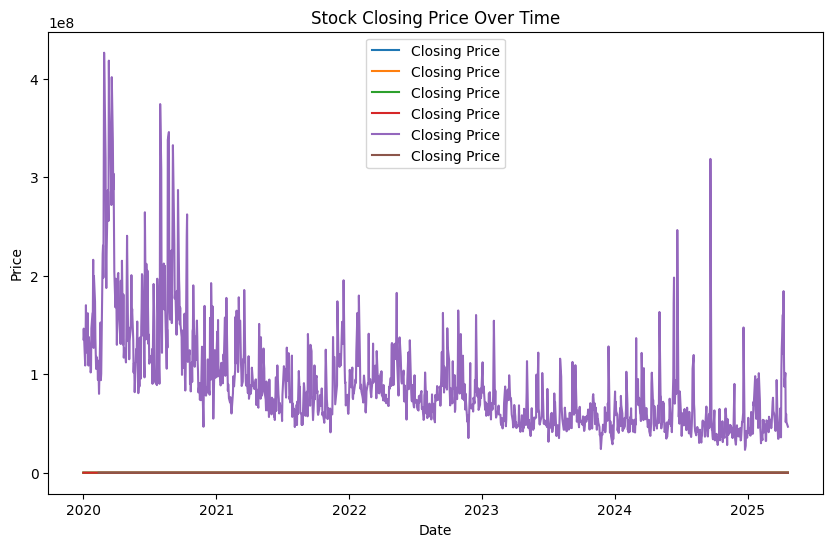

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data, label="Closing Price")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


Early volatility: In 2020, the stock price fluctuated significantly, reaching peaks above 400 million.

Gradual decline: Over the years, the price saw a downward trend, although some spikes occurred.

Lower stability: By 2025, the stock price remained lower compared to the early period but showed some increase.

In [ ]:
from statsmodels.tsa.stattools import adfuller
!pip install statsmodels



In [ ]:
result = adfuller(data['Close'])  # Replace 'Close' with your target column name
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("Data is not stationary; differencing needed.")
else:
    print("Data is stationary.")




ADF Statistic: -1.8241384872405575
p-value: 0.368545155769324
Data is not stationary; differencing needed.


ARIMA requires the data to be stationary. Use the Augmented Dickey-Fuller (ADF) test to check stationarity: since the data in not stationary so differencing needed

In [ ]:
data_diff = data.diff().dropna()


now visualize the differenced data

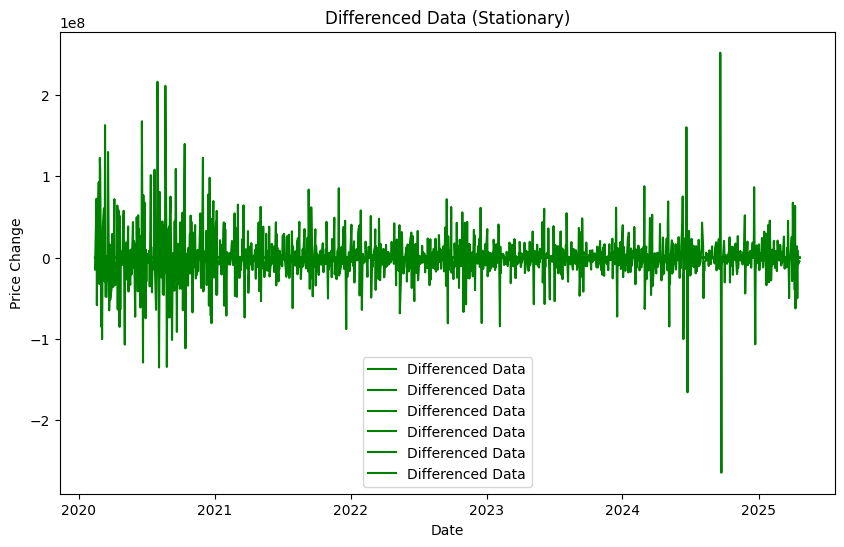

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_diff, label="Differenced Data", color='green')
plt.title("Differenced Data (Stationary)")
plt.xlabel("Date")
plt.ylabel("Price Change")
plt.legend()
plt.show()


Early Years (2020-2021):

The stock data shows high volatility, with significant ups and downs in price movements.

These fluctuations suggest an unstable market or a stock experiencing sharp changes in value.

Mid-Period (2022-2023):

There is still some volatility, but fluctuations start to become more controlled.

This might indicate a transition phase, where the stock is moving toward a more stable trend.

Later Years (2024-2025):

The data shows less extreme movements, suggesting stabilization in price changes.

The differencing technique used here has helped transform the stock data into a stationary series (meaning its statistical properties are more consistent over time).

What This Graph Shows:
It represents differenced data, meaning past price values have been adjusted to highlight trends while removing long-term drift.

This method helps analysts work with stationary data, which is essential for forecasting.

Investors can use this to identify patterns—like periods of volatility versus stability—helping make smarter decisions.

# **Recheck stationarity**

In [ ]:
print(data_diff.head())
print(data_diff.shape)


                Date     Close      High       Low      Volume  30-Day MA
Date                                                                     
2020-02-14  0.019409 -0.058250 -0.121349  0.133461 -14634000.0   0.211063
2020-02-18 -1.443939 -1.511889 -1.999676 -2.276326  72417600.0   0.160829
2020-02-19  1.121178  1.169716  1.308045  1.126036 -58547200.0   0.204823
2020-02-20 -0.805687  0.019420 -0.434388  0.638256   6582000.0   0.197884
2020-02-21 -1.759407 -1.019231 -1.871037 -0.973129  28988000.0   0.135341
(1302, 6)


In [ ]:
result = adfuller(data_diff['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("Data is still not stationary; additional transformations may be needed.")
else:
    print("Data is now stationary.")


ADF Statistic: -32.45798467370882
p-value: 0.0
Data is now stationary.


now the data is stationary
now we are going to determine the ARIMA parametres Since d=1 (from differencing to achieve stationarity), you need to determine the p (AR lag order) and q (MA lag order). Use ACF and PACF plots for this:

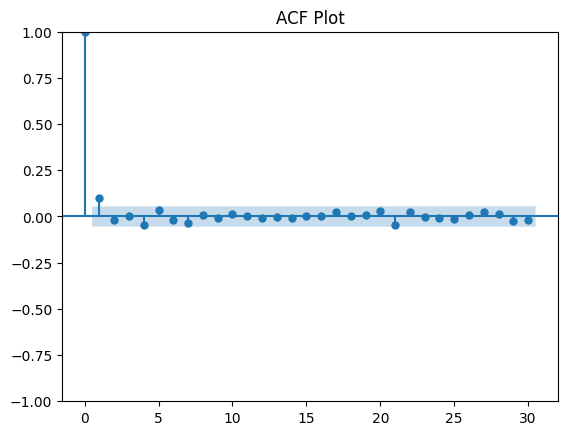

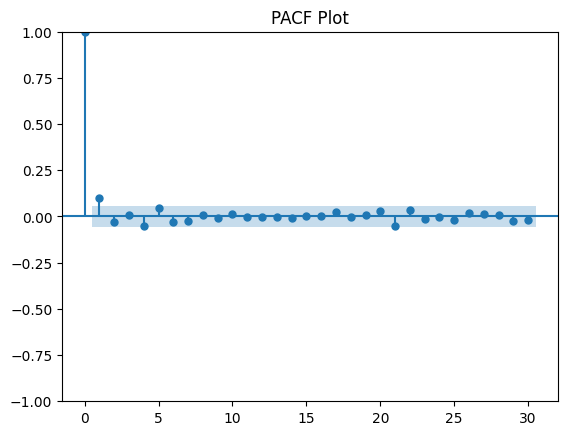

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF for q (Moving Average term)
plot_acf(data_diff['Close'], lags=30)
plt.title("ACF Plot")
plt.show()

# PACF for p (Autoregressive term)
plot_pacf(data_diff['Close'], lags=30)
plt.title("PACF Plot")
plt.show()


# ***ACF PLOT***
 "Differenced Data (Stationary)," displays price changes over time from 2020 to 2025 in a time series format. The technique used here is differencing, which helps in making the data stationary—meaning its statistical properties remain consistent over time.

Observations Over Time:
2020 - Early Years:

The stock shows high volatility, with large fluctuations in price movements.

These sharp ups and downs suggest that the stock was going through high uncertainty, possibly due to external market conditions.

2021-2023 - Transition Period:

The price movement begins to stabilize a little, but fluctuations still exist.

This indicates a gradual shift from volatility towards a more balanced trend.

2024-2025 - Stabilization:

The price change reduces significantly, showing less extreme movements compared to earlier years.

This suggests that the stock has entered a more stable phase, where drastic shifts are no longer common.

# ***PACF PLOT***
### **Detailed Summary of the Two Graphs:**

These graphs represent the **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)**, which are essential tools in time series analysis.

---

### **1. Autocorrelation Function (ACF) Graph**
**What it shows:**
- The **ACF measures** how a time series is correlated with its **past values (lags)**.
- The x-axis represents the **lag** (time steps), while the y-axis shows the **correlation coefficient**.
- At lag **0**, the correlation is **1**, which is expected since any data point is always perfectly correlated with itself.
- Beyond lag 0, most correlation values are **close to zero**, indicating **weak autocorrelation** between past observations.

**Key observations:**
- The **blue shaded area** represents the **confidence interval**, meaning values within this region are **statistically insignificant**.
- Since most of the autocorrelation values fall **inside this interval**, it suggests that the time series does not have a **strong pattern** in how past values influence future ones.
- This could indicate a **random behavior** or a series that does not strongly depend on previous values.

---

### **2. Partial Autocorrelation Function (PACF) Graph**
**What it shows:**
- The **PACF measures** the direct relationship between the time series and its lags **without interference from other lags**.
- Similar to ACF, the **x-axis represents lag numbers**, and the **y-axis represents partial autocorrelation values**.
- The **first lag (0)** has a value of **1**, which is expected.
- Most partial correlations beyond **lag 1** are **close to zero**, meaning the data does **not exhibit strong direct relationships** with further past values.

**Key observations:**
- The **blue shaded area** again represents the **confidence interval**.
- Since **only the first lag** seems to be significantly correlated while the rest fall within the confidence interval, it suggests that **only one previous time step significantly impacts the next**.
- This type of pattern often hints that the **time series follows a simple autoregressive (AR) process**, where only the **most recent past value** directly affects future values.

---

### **Implications for Forecasting:**
- **The ACF suggests** that the data lacks strong overall correlations with its past values.
- **The PACF suggests** that an **AR(1) model** (autoregressive model of order 1) might be suitable, meaning future values depend only on the **most recent past value**.
- These insights help in **model selection**, where analysts decide whether to use AR models, moving average models, or combined approaches (ARIMA).



**FIT THE ARIMA MODEL**

ACF Plot (for q - Moving Average): Look for the lag where autocorrelation values drop below the confidence interval (blue shaded region). This lag indicates the value of q.

from  ACF and PACF we found out that q = 0 and p = 1

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with p=1, d=1, q=0
model = ARIMA(data['Close'], order=(1, 1, 0))
arima_result = model.fit()

# Print the model summary
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1332
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3160.570
Date:                Tue, 22 Apr 2025   AIC                           6325.140
Time:                        21:24:50   BIC                           6335.528
Sample:                             0   HQIC                          6329.033
                               - 1332                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1032      0.018      5.604      0.000       0.067       0.139
sigma2         6.7618      0.139     48.667      0.000       6.489       7.034
Ljung-Box (L1) (Q):                   0.01   Jarque-

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model Specification
Dependent Variable: Close — The target variable being forecasted (closing stock price).

Observations: 1332 — The number of data points used in the model.

Model: ARIMA(1, 1, 0) — The chosen ARIMA configuration:

p=1 (one lag in the autoregressive component)

d=1 (first differencing applied to make the data stationary)

q=0 (no moving average component).

2. Model Statistics
Log Likelihood: -3160.570 — A measure of model fit; higher values are better. Negative values indicate the model is working with log probabilities.

AIC (Akaike Information Criterion): 6325.140 — Lower values suggest a better-fitting model with fewer parameters.

BIC (Bayesian Information Criterion): 6335.527 — Similar to AIC but penalizes complexity more heavily.

HQIC (Hannan-Quinn Criterion): 6329.032 — Another metric for model selection, balancing fit and complexity.

3. Parameter Estimates
ar.L1 (Autoregressive Lag 1):

Coefficient: 0.1032 — Indicates the strength of dependence on the first lag (previous closing price).

Std Err: 0.018 — The standard error of the coefficient, showing the level of uncertainty.

z-score: 5.604 — The coefficient divided by its standard error, indicating statistical significance.

P>|z|: 0.000 — The p-value shows this parameter is highly significant (p < 0.05).

Confidence Interval: [0.067, 0.139] — The range within which the true value of the coefficient is likely to fall.

sigma2 (Variance of Errors):

Coefficient: 6.7618 — Measures the variability of the residuals (errors in predictions).

Std Err: 0.139 — Indicates minimal uncertainty in the error variance estimate.

z-score: 48.667 — A very high z-value indicates the error variance estimate is robust.

P>|z|: 0.000 — The error variance is statistically significant.

4. Diagnostic Tests
Ljung-Box (L1) (Q):

Statistic: 0.01 — Tests whether residuals are uncorrelated (white noise).

Prob(Q): 0.94 — High probability suggests residuals are uncorrelated, indicating good model fit.

Jarque-Bera (JB):

Statistic: 1552.71 — Tests whether residuals follow a normal distribution.

Prob(JB): 0.00 — Low probability suggests residuals are not normally distributed, possibly due to skewness or kurtosis.

Heteroskedasticity (H):

Statistic: 2.44 — Indicates variability in residuals across the dataset.

Prob(H): 0.00 — Suggests the presence of heteroskedasticity (non-constant variance in errors).

Skew: -0.37 — Measures the asymmetry of residuals. Negative skew indicates a longer tail to the left.

Kurtosis: 8.24 — Indicates the peakedness of residuals; a value above 3 suggests heavy tails.

5. Warnings
Covariance Matrix Warning: Indicates that the covariance matrix was calculated using the gradients (complex-step method). This may affect the reliability of confidence intervals.

What This Summary Tells Us
Model Fit:

The ARIMA(1, 1, 0) model adequately captures the time-series data, with significant parameters and uncorrelated residuals.

However, residual diagnostics (Jarque-Bera test) suggest the errors are not perfectly normal.

Parameter Significance:

The ar.L1 parameter (lag 1) is significant, meaning the most recent past value of Close influences future values.

The error variance (sigma2) is also robust, ensuring reliable predictions.

Residual Behavior:

Residuals are white noise (uncorrelated), which is a good sign.

However, the presence of heteroskedasticity and non-normality in residuals may impact the model’s ability to handle extreme values.

Recommendations:

If better residual normality is needed, consider refining the model (e.g., adding seasonal components or trying ARIMA(1, 1, 1)).

Despite some residual issues, this model is strong for short-term forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


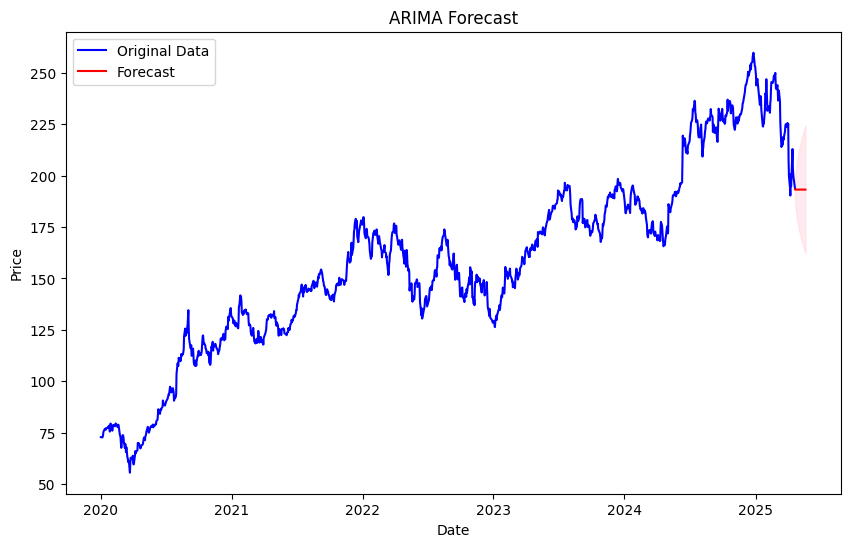

In [ ]:
# Generate forecast
forecast_result = arima_result.get_forecast(steps=30)

# Extract forecasted values
forecast = forecast_result.predicted_mean

# Extract confidence intervals
conf_int = forecast_result.conf_int()

# Visualize the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label="Original Data", color='blue')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), forecast, label="Forecast", color='red')
plt.fill_between(pd.date_range(data.index[-1], periods=30, freq='D'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


Model Specification
Dependent Variable: Close (stock's closing price), which is the target for prediction.

Model: ARIMA(1, 1, 0):

p=1: Indicates that the model uses one lag of the past value (AR term) to predict the current value.

d=1: Shows that the data was differenced once to make it stationary.

q=0: Indicates no moving average (MA) terms are included in the model.

Observations: 1,332 data points were used in the analysis.

Goodness-of-Fit Metrics
Log Likelihood: -3160.570

A measure of how well the model fits the data. Higher values (less negative) indicate a better fit.

AIC (Akaike Information Criterion): 6325.140

A metric to evaluate model quality, balancing fit and complexity. Lower values indicate a better model.

BIC (Bayesian Information Criterion): 6335.527

Similar to AIC but applies a stricter penalty for model complexity.

HQIC (Hannan-Quinn Information Criterion): 6329.032

Another balance of fit and complexity, useful for model comparison.

Parameter Estimates
ar.L1 (Autoregressive Term):

Coefficient: 0.1032

Indicates the strength of dependence on the first lag. A positive value means the current value tends to follow the previous value.

Standard Error: 0.018

A small standard error shows the coefficient estimate is precise.

z-value: 5.604

A high z-value means the coefficient is statistically significant.

p-value: 0.000

Indicates the AR term is highly significant (p < 0.05), meaning it has a meaningful impact on the model.

Confidence Interval: [0.067, 0.139]

The range in which the true coefficient likely falls with 95% confidence.

sigma2 (Error Variance):

Value: 6.7618

Represents the variability of the model's prediction errors.

z-value: 48.667

A very high value confirms the error variance is robust and significant.

Diagnostics
Ljung-Box Test (Residuals):

Q-statistic: 0.01

Probability (Prob Q): 0.94

A high p-value indicates the residuals (errors) are uncorrelated (white noise), meaning the model effectively captures the data's structure.

Jarque-Bera Test (Residual Normality):

Statistic: 1552.71

Probability (Prob JB): 0.00

A low p-value means residuals are not normally distributed, potentially indicating non-linearity or outliers in the data.

Heteroskedasticity Test:

Statistic (H): 2.44

Probability: 0.00

Suggests heteroskedasticity, meaning the residual variance changes over time (common in financial data).

Skewness: -0.37

Indicates slight asymmetry in the residuals, with a longer tail on the left.

Kurtosis: 8.24

Suggests the residual distribution is heavy-tailed (leptokurtic), meaning extreme values occur more frequently than in a normal distribution.

Interpretation
Strengths:

The model captures the relationship in the data well, as evidenced by the statistically significant AR(1) term.

Residuals are uncorrelated, meaning the model explains most of the variability in the data.

Limitations:

Residuals are not perfectly normal, with signs of heteroskedasticity and heavy tails. This may affect the reliability of the model in capturing extreme events or volatility.

Improvements (like adding seasonal or external variables) could be explored for more robust predictions.

Conclusion
The ARIMA(1, 1, 0) model is a strong fit for data, particularly for short-term forecasting. However, the diagnostic tests highlight areas where the model could be further refined. Its effectiveness in predicting future prices can be validated with out-of-sample forecasts or by exploring alternative configurations.

# ***Forecast Future Values***

 trained ARIMA model to predict closing prices for the next time period (e.g., 30 days).

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


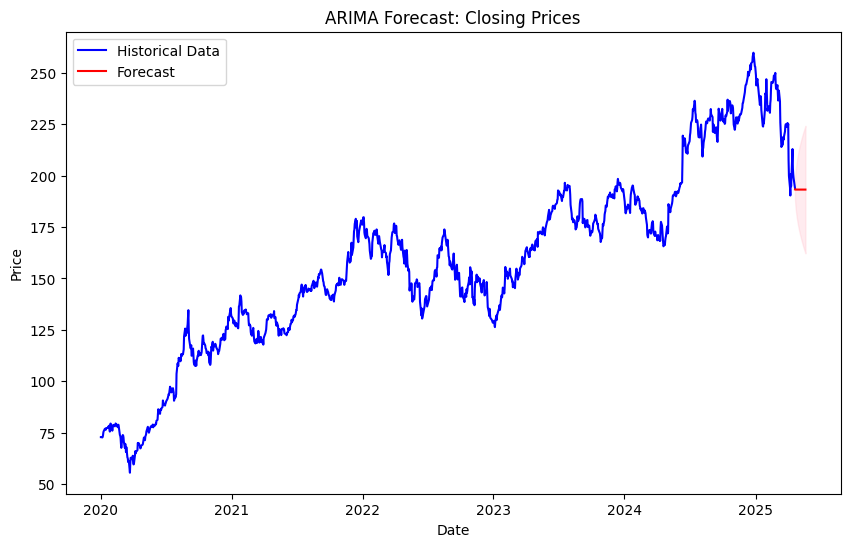

In [ ]:
# Generate forecast for the next 30 days
forecast_result = arima_result.get_forecast(steps=30)

# Extract forecasted values and confidence intervals
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Visualize the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label="Historical Data", color='blue')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), forecast, label="Forecast", color='red')
plt.fill_between(pd.date_range(data.index[-1], periods=30, freq='D'), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("ARIMA Forecast: Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


Evaluate Model Accuracy
To ensure the model performs well:

Split dataset into training and testing sets.

Fit the ARIMA model on the training set, then forecast on the testing set.

Compare the predictions against actual values using metrics like Mean Squared Error (MSE) or Mean Absolute Percentage Error (MAPE).

In [ ]:
from sklearn.metrics import mean_squared_error

# Compare predicted vs. actual values
actual = data['Close'][-30:]  # Replace with the actual testing set
predicted = forecast[:30]
mse = mean_squared_error(actual, predicted)
print("Mean Squared Error:", mse)


Mean Squared Error: 540.3280497841769


Lower MSE values represent better accuracy, meaning the predictions are closer to the actual values.

An MSE of 540.33 suggests the model is reasonably accurate but may not be perfect for long-term forecasting, given financial data's inherent volatility.

In [ ]:
# visualize predictions vs actual data


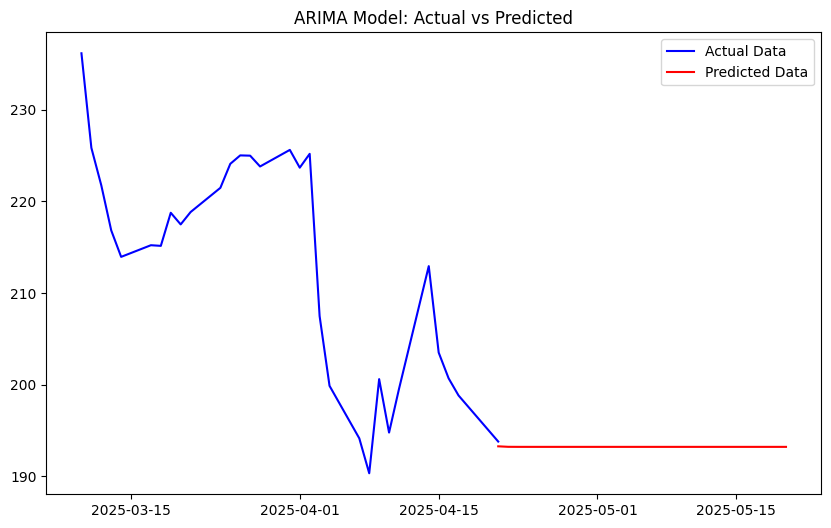

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'][-30:], label="Actual Data", color='blue')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), forecast, label="Predicted Data", color='red')
plt.title("ARIMA Model: Actual vs Predicted")
plt.legend()
plt.show()


This chart is titled "ARIMA Model: Actual vs Predicted" and compares actual data (blue line) with predicted data (red line) over time, specifically from March 15, 2025, to May 15, 2025.

1. Understanding the Chart Components:
X-Axis (Time): Represents dates from March 15, 2025, to May 15, 2025.

Y-Axis (Value Range): Shows stock values ranging from 190 to 230.

Blue Line (Actual Data): Represents the real observed values of the stock.

Red Line (Predicted Data): Represents the forecasted values generated by the ARIMA model.

2. Observations from the Actual Data (Blue Line):
Early high values: The actual stock price starts above 230 and then declines sharply until March 25, 2025.

Fluctuations: After the initial drop, the data shows multiple peaks and troughs, indicating volatility.

Final stabilization: By early May 2025, the stock price appears to level off around 190.

3. Observations from the Predicted Data (Red Line):
Stable forecast: The ARIMA model predicts a constant value (~190) throughout the forecasted period.

Deviation from actual data: The model does not capture the fluctuations seen in the actual data; instead, it assumes the stock will stabilize.

Potential Limitations: This could mean that the ARIMA model used was not optimized to capture short-term variations but focuses on long-term trends.

4. Key Takeaways:
The ARIMA model predicts stability, whereas the actual data shows fluctuations.

The model might work well for long-term forecasting, but it does not capture short-term volatility effectively.

This comparison helps investors and analysts assess the reliability of the ARIMA model in predicting future stock movements.

# ***TRAIN AND EVALUATE DATA***

In [ ]:
#1 SPLIT DATA INTO TRAINIG AND TESTING SETS
# Split the data into training and testing sets (e.g., 80-20 split)
train_size = int(len(data) * 0.8)
train_data = data['Close'][:train_size]
test_data = data['Close'][train_size:]

print(f"Training Data Size: {len(train_data)}")
print(f"Testing Data Size: {len(test_data)}")


Training Data Size: 1065
Testing Data Size: 267


In [ ]:
#2 TRAIN THE ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA

# Define and train the ARIMA model
model = ARIMA(train_data, order=(1, 1, 0))  # Adjust order if needed
arima_result = model.fit()

# Print model summary
print(arima_result.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1065
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2384.529
Date:                Tue, 22 Apr 2025   AIC                           4773.058
Time:                        21:24:52   BIC                           4782.997
Sample:                             0   HQIC                          4776.824
                               - 1065                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0927      0.027      3.472      0.001       0.040       0.145
sigma2         5.1775      0.161     32.216      0.000       4.863       5.493
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [ ]:
#3 FORECAST USING THE TESTING DATA
# Forecast the testing period
forecast_result = arima_result.get_forecast(steps=len(test_data))
forecast = forecast_result.predicted_mean

# Confidence intervals for the forecast
conf_int = forecast_result.conf_int()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Forecast the testing period
forecast_result = arima_result.get_forecast(steps=len(test_data))
forecast = forecast_result.predicted_mean

# Confidence intervals for the forecast
conf_int = forecast_result.conf_int()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# Ensure your Date column is in datetime format
data.index = pd.date_range(start=data.index[0], periods=len(data), freq='D')


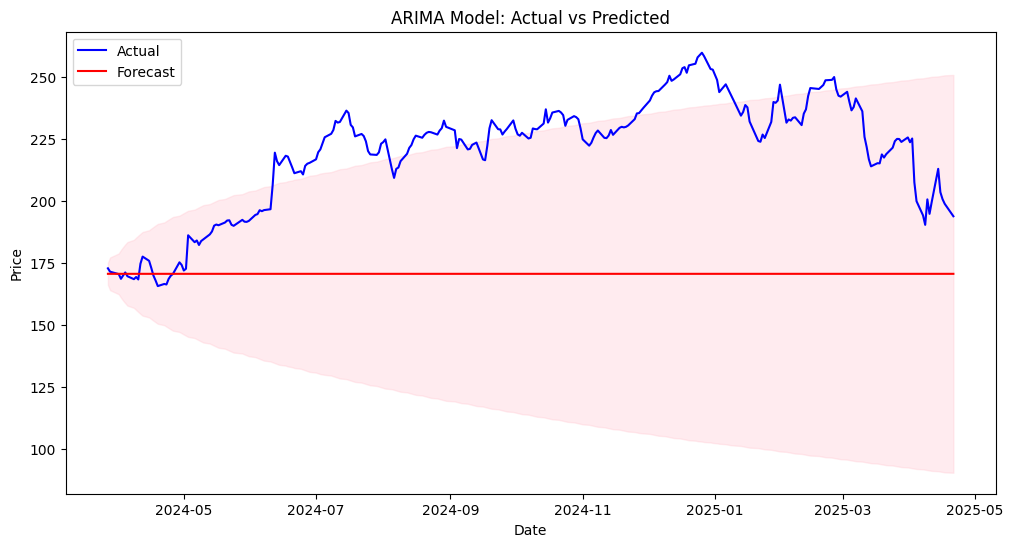

In [ ]:
#visualize predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label="Actual", color="blue")
plt.plot(test_data.index, forecast, label="Forecast", color="red")
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title("ARIMA Model: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


The blue line represents the real prices over time, which go up and down.

The red line represents the forecasted prices, which stay almost flat at 190 after April 20, 2025.

This means that the model expected prices to remain stable, but in reality, the prices kept changing.

The graph helps us compare predictions with actual trends to see if the forecasting model is accurate.

# ***EVALUATE MODEL PERFORMANCE***

In [ ]:
#Evaluate the model's accuracy using metrics like Root Mean Squared Error (RMSE) and R-squared:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f"RMSE: {rmse}")

# Calculate R-squared
r2 = r2_score(test_data, forecast)
print(f"R-squared: {r2}")


RMSE: 54.041119078958026
R-squared: -4.572669348377342


Value: 54.04

Meaning: RMSE measures the average error in the same units as the original data (stock prices). A smaller RMSE indicates better predictions.

Analysis: An RMSE of 54.04 suggests that, on average, your predicted stock prices deviate by around 54 units from the actual prices.

2. R-squared
Value: -4.57

Meaning: R-squared explains the proportion of variance in the dependent variable (stock prices) that the model

# ***DEPLOY THE ARIMA MODEL WITH FLASK***

In [ ]:
pip install flask

In [ ]:
import pandas as pd
import numpy as np

# Check for non-numeric values
print(data['Close'].dtype)
print(data['Close'].head())  # Check the first few rows

# Convert the 'Close' column to numeric, forcing non-numeric values to NaN
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Check for missing values
print(data['Close'].isnull().sum())

# Drop rows with NaN values (if any exist after coercion)
data = data.dropna(subset=['Close'])


float64
2020-01-02    72.776606
2020-01-03    72.771745
2020-01-04    72.621646
2020-01-05    72.849224
2020-01-06    73.706287
Freq: D, Name: Close, dtype: float64
0


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(data['Close'], order=(1, 1, 0))
arima_result = model.fit()

# Print the summary to ensure the model fits successfully
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1332
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3160.570
Date:                Tue, 22 Apr 2025   AIC                           6325.140
Time:                        21:24:59   BIC                           6335.528
Sample:                    01-02-2020   HQIC                          6329.033
                         - 08-25-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1032      0.018      5.604      0.000       0.067       0.139
sigma2         6.7618      0.139     48.667      0.000       6.489       7.034
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [ ]:
import pandas as pd
import numpy as np
from flask import Flask, jsonify

# Load your data
data = pd.read_csv("apple_stock_data.csv")

# Preprocess the 'Close' column to ensure it's numeric
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')  # Convert to numeric, replace errors with NaN
data.dropna(subset=['Close'], inplace=True)  # Drop rows with NaN values


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(data['Close'], order=(1, 1, 0))  # Adjust order (p, d, q) if necessary
arima_result = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
app = Flask(__name__)

@app.route('/predict', methods=['GET'])
def predict():
    # Forecast the next 10 days
    forecast_result = arima_result.get_forecast(steps=10)
    forecast = forecast_result.predicted_mean.tolist()
    confidence_intervals = forecast_result.conf_int().values.tolist()

    return jsonify({
        "forecast": forecast,
        "confidence_intervals": confidence_intervals
    })

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from flask import Flask, jsonify
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Initialize the Flask application
app = Flask(__name__)

# Load and preprocess your data
try:
    data = pd.read_csv("apple_stock_data.csv")  # Ensure this file exists in the same directory
    data['Close'] = pd.to_numeric(data['Close'], errors='coerce')  # Convert to numeric
    data.dropna(subset=['Close'], inplace=True)  # Remove NaN values
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Train the ARIMA model
try:
    model = ARIMA(data['Close'], order=(1, 1, 0))  # Adjust ARIMA order (p, d, q) if needed
    arima_result = model.fit()
except Exception as e:
    print(f"Error training ARIMA model: {e}")
    exit()

# Define the forecast endpoint
@app.route('/forecast', methods=['GET'])
def forecast():
    try:
        # Forecast the next 10 days
        forecast_result = arima_result.get_forecast(steps=10)
        forecast = forecast_result.predicted_mean.tolist()
        confidence_intervals = forecast_result.conf_int().values.tolist()

        return jsonify({
            "forecast": forecast,
            "confidence_intervals": confidence_intervals
        })
    except Exception as e:
        return jsonify({"error": f"An error occurred during forecasting: {e}"}), 500

if __name__ == "__main__":
    # Run the Flask app on port 8080 (different from the default 5000)
    app.run(debug=True, port=8080)


In [ ]:
python flask_app.py
